In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [151]:
df = pd.read_csv("accident.csv")

In [152]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [154]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

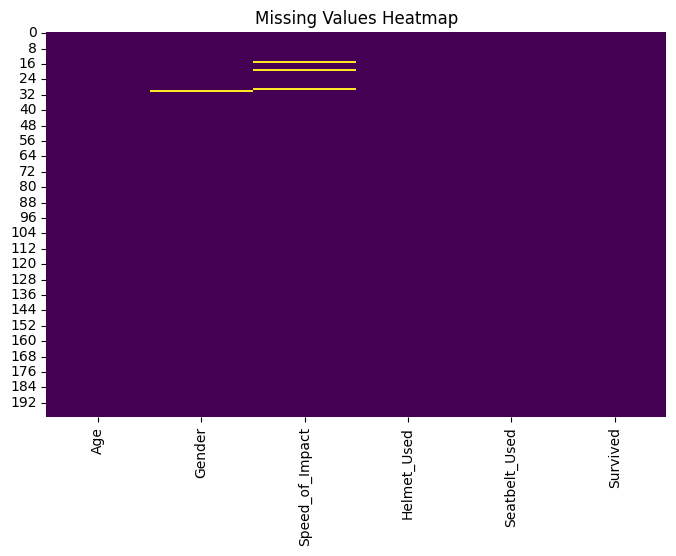

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [156]:
df['Speed_of_Impact'].unique()

array([ 27.,  46., 117.,  40.,  49., 116.,  47.,  83.,  88.,  80.,  67.,
        38.,  23.,  nan,  68.,  36., 111., 112.,  65.,  25., 118.,  56.,
        43.,  72., 114.,  79.,  82., 104.,  51., 106.,  52.,  86.,  37.,
        44.,  73.,  77.,  66., 105.,  42.,  85.,  21., 109.,  28.,  62.,
        58.,  61.,  45.,  69.,  32.,  26.,  76.,  55.,  64.,  39.,  84.,
        35.,  33.,  95.,  34.,  70.,  81.,  41.,  71.,  89.,  24.,  87.,
       115., 113.,  74.,  59.,  31.,  20.,  53., 108.,  48.,  97., 119.,
        29.,  99., 110., 103.])

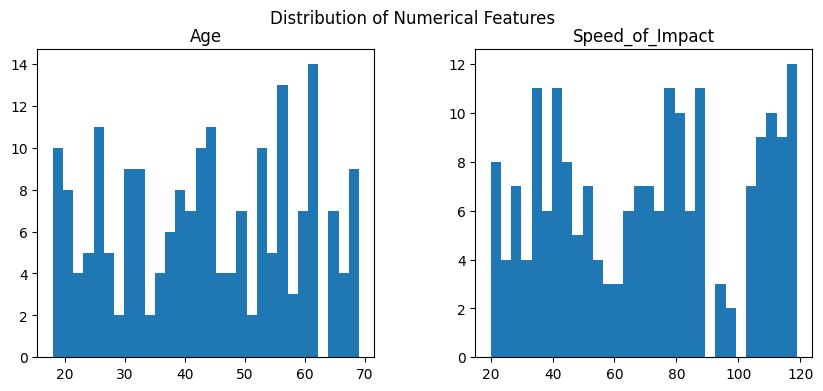

In [157]:
import matplotlib.pyplot as plt

df[['Age', 'Speed_of_Impact']].hist(bins=30, figsize=(10, 4), grid=False)
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [158]:
df[['Age', 'Speed_of_Impact']].skew()

Age               -0.052746
Speed_of_Impact    0.051614
dtype: float64

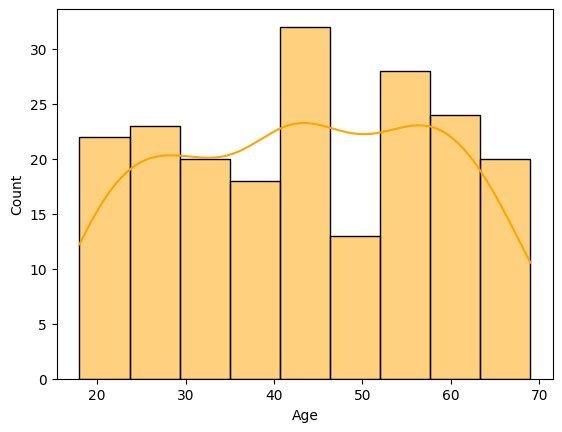

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'],kde=True, color='orange')
plt.show()

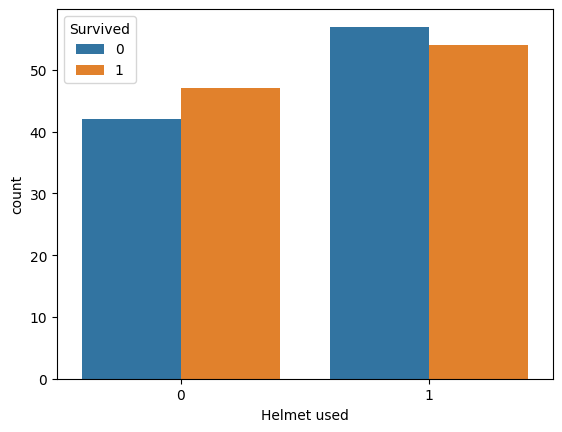

In [175]:
sns.countplot(x='Helmet_Used', hue='Survived', data=df)
plt.xlabel('Helmet used')
plt.show()

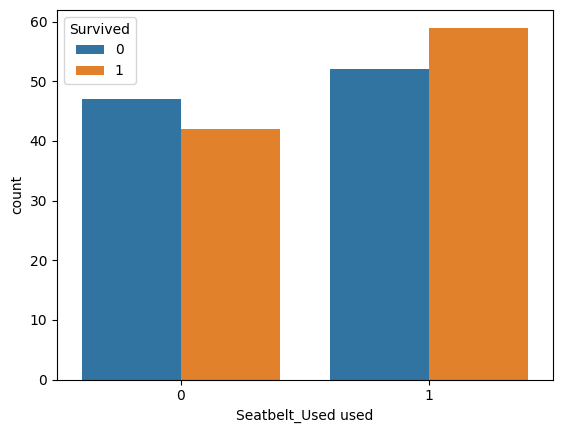

In [176]:
#Now try to understand how using Seatbelt creating impact on survival

sns.countplot(x='Seatbelt_Used', hue='Survived', data=df)
plt.xlabel('Seatbelt_Used used')
plt.show()

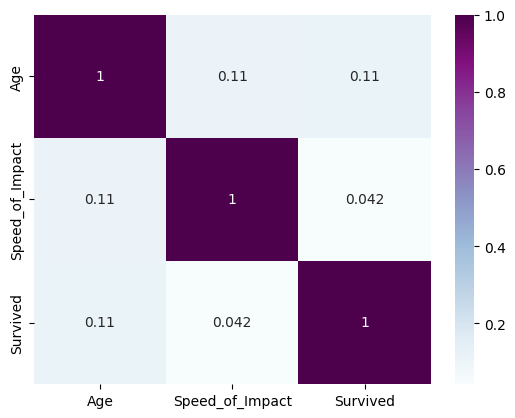

In [177]:
calculated_corr = df[['Age', 'Speed_of_Impact', 'Survived']].corr()
sns.heatmap(calculated_corr, annot=True, cmap='BuPu')
plt.show()

In [159]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].mean(),inplace=True)

In [138]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [160]:
print(df['Gender'].value_counts())


Female    110
Male       89
Name: Gender, dtype: int64


In [161]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [162]:
print("Duplicate rows:", df.duplicated().sum())  # Count duplicate


Duplicate rows: 0


In [163]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [164]:
# Convert categorical features to numerical
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Helmet_Used"] = df["Helmet_Used"].map({"Yes": 1, "No": 0})
df["Seatbelt_Used"] = df["Seatbelt_Used"].map({"Yes": 1, "No": 0})



In [165]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


Feature Selection using Correlation

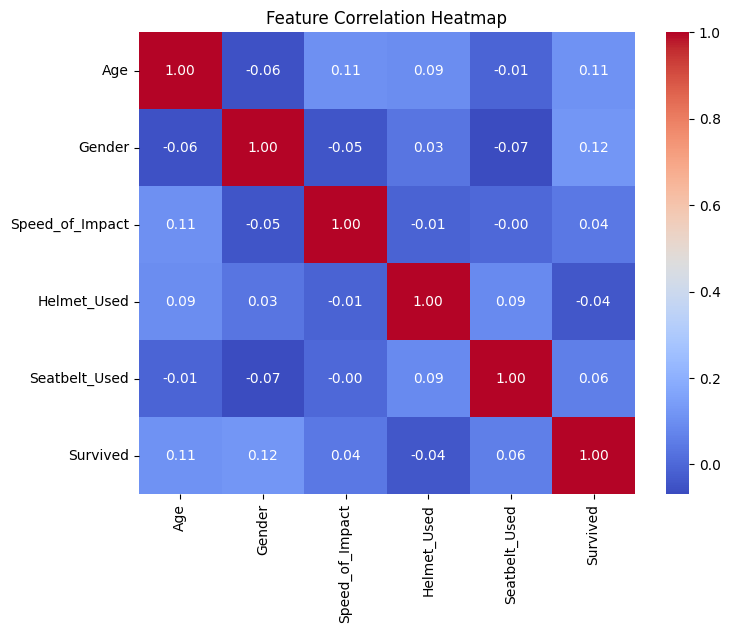

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Dividig the Feature into Independent and Dependent Variables

In [166]:
X = df.drop(columns=["Survived"])  # Drop target column
y = df["Survived"]  # Target variable


Now We'll split the data for training and testing

In [168]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [171]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probability scores

In [172]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob))


 Accuracy: 0.525

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.70      0.60        20
           1       0.54      0.35      0.42        20

    accuracy                           0.53        40
   macro avg       0.53      0.52      0.51        40
weighted avg       0.53      0.53      0.51        40


 AUC-ROC Score: 0.5475
